<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>




# 서울시 인구 분석

<img src='https://raw.githubusercontent.com/Jangrae/img/master/people2.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [110]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [111]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 pop01, pop02, pop03 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'
- 단축 경로1: 'https://bit.ly/PopH01File'
- 단축 경로2: 'https://bit.ly/PopH02File'
- 단축 경로3: 'https://bit.ly/PopH03File'

In [112]:
# pop01 데이터 읽어오기
path = 'https://bit.ly/PopH01File'
pop01 = pd.read_csv(path)

# 확인
pop01.head()

,year,k_male,k_female
0,1981,4160,4191
1,1982,4160,4191
2,1983,4160,4191
3,1984,4160,4191
4,1985,4160,4191


In [113]:
# pop02 데이터 읽어오기
path = 'https://bit.ly/PopH02File'
pop02 = pd.read_csv(path)

# 확인
pop02.head()

,year,f_male,f_female
0,1985,7,6
1,1986,7,5
2,1987,6,5
3,1988,5,5
4,1989,6,5


In [114]:
# pop03 데이터 읽어오기
path = 'https://bit.ly/PopH03File'
pop03 = pd.read_csv(path)

# 확인
pop03.head()

,year,household,older_65
0,1981,1915,246
1,1982,2001,260
2,1983,2116,260
3,1984,2246,275
4,1985,2338,211


## 2. 데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 데이터프레임 크기 확인**

- 세 개의 데이터프레임 크기(행 수, 열 수)를 확인합니다.

In [115]:
# 데이터 크기 확인

print(pop01.shape)
print(pop02.shape)
print(pop03.shape)

(40, 3)
(36, 3)
(40, 3)


**2) year 최솟값, 최댓값 확인**

- 세 개의 데이터프레임 year열 최솟값, 최댓값 크기를 비교해 차이가 있는 지 각각 확인합니다.

In [116]:
# year 최댓값, 최솟값 확인 1

print('pop01최대값:', pop01['year'].max(), 'pop01최소값:', pop01['year'].min())
print('pop02최대값:', pop02['year'].max(), 'pop01최소값:', pop02['year'].min())
print('pop03최대값:', pop03['year'].max(), 'pop01최소값:', pop03['year'].min())

pop01최대값: 2020 pop01최소값: 1981
pop02최대값: 2020 pop01최소값: 1985
pop03최대값: 2020 pop01최소값: 1981


In [117]:
# year 최댓값, 최솟값 확인 2

print('pop01[year]: {} ~ {}'.format(pop01['year'].min(), pop01['year'].max()))
print('pop02[year]: {} ~ {}'.format(pop02['year'].min(), pop02['year'].max()))
print('pop03[year]: {} ~ {}'.format(pop03['year'].min(), pop03['year'].max()))

pop01[year]: 1981 ~ 2020
pop02[year]: 1985 ~ 2020
pop03[year]: 1981 ~ 2020


→ 최대값은 모두 같고  
→ 최소값은 모두 다름

**3) 결측치 확인**

- 세 개의 데이터프레임에 결측치가 있는 지 각각 확인합니다.

In [118]:
# 결측치 확인

print(pop01.isnull().sum())
print(pop02.isnull().sum())
print(pop03.isnull().sum())

year        0
k_male      0
k_female    0
dtype: int64
year        0
f_male      0
f_female    0
dtype: int64
year         0
household    0
older_65     0
dtype: int64


→ 세 개의 데이터프레임에 결측치 없음 확인

## 3. 데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합**

- concat을 사용해 연결하면 인덱스 값을 기준으로 연결되어 데이터가 어긋납니다.
- **year** 열을 기준으로 **outer** 방식으로 조인(병합)합니다.
- 외국인 정보가 1981 ~ 1984년이 누락되어 결측치가 발생할 것입니다.
- 세 개의 데이터프레임을 병합(조인)하여 pop 데이터프레임을 선언합니다.
- 이후의 모든 작업은 pop 데이터프레임을 대상으로 진행합니다.

In [119]:
# 데이터프레임 조인
pop = pd.merge(pop01, pop02, on='year', how='outer')
pop = pd.merge(pop, pop03, on='year', how='outer')

# 확인
print(pop.head())

   year  k_male  k_female  f_male  f_female  household  older_65
0  1981    4160      4191     NaN       NaN       1915       246
1  1982    4160      4191     NaN       NaN       2001       260
2  1983    4160      4191     NaN       NaN       2116       260
3  1984    4160      4191     NaN       NaN       2246       275
4  1985    4160      4191     7.0       6.0       2338       211


**2) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [120]:
# 결측치 확인
pop.isnull().sum()

year         0
k_male       0
k_female     0
f_male       4
f_female     4
household    0
older_65     0
dtype: int64

**3) 결측치 저리**

- 연도별 인구 현황이므로 임의의 값을 채우는 것이 바람직하지 않아 보입니다.
- 이후 값, 즉 1985년 값으로 채우는 것도 정확한 분석을 방해할 것 같습니다.
- 이에 결측치가 있는 1981년~1984년 행을 제거할 것입니다.

In [121]:
# 결측치 제거하기 전에 pop 데이터프레임 정보확인
print(pop.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       40 non-null     int64  
 1   k_male     40 non-null     int64  
 2   k_female   40 non-null     int64  
 3   f_male     36 non-null     float64
 4   f_female   36 non-null     float64
 5   household  40 non-null     int64  
 6   older_65   40 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 2.5 KB
None


In [122]:
# 결측치 제거
pop.dropna(axis=0, inplace=True)
 
# 확인
print(pop.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 4 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       36 non-null     int64  
 1   k_male     36 non-null     int64  
 2   k_female   36 non-null     int64  
 3   f_male     36 non-null     float64
 4   f_female   36 non-null     float64
 5   household  36 non-null     int64  
 6   older_65   36 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 2.2 KB
None


**3) 열 추가**

- 이후 분석의 편의를 위해 다음과 같은 의미를 갖는 열을 추가하고자 합니다.
    - k_total = 전체 한국인 인구수
    - f_total = 전체 외국인 인구수
    - male = 전체 남자 인구수
    - female = 전체 여자 인구수
    - total = 전체 인구수
- 추가할 열에 대한 공식은 다음과 같습니다.
    - k_total = k_male + k_female
    - f_total = f_male + f_female
    - male = k_male + f_male
    - female = k_female + f_female
    - total = k_total + f_total
- 정리한 공식에 따라 데이터프레임에 열을 추가합니다.

In [123]:
# 열 추가
pop['k_total'] = pop['k_male'] + pop['k_female']
pop['f_total'] = pop['f_male'] + pop['f_female']
pop['male'] = pop['k_male'] + pop['f_male']
pop['female'] = pop['k_female'] + pop['f_female']
pop['total'] = pop['k_total'] + pop['f_total']

#  확인
pop.head()

,year,k_male,k_female,f_male,f_female,household,older_65,k_total,f_total,male,female,total
4,1985,4160,4191,7.0,6.0,2338,211,8351,13.0,4167.0,4197.0,8364.0
5,1986,4899,4888,7.0,5.0,2428,305,9787,12.0,4906.0,4893.0,9799.0
6,1987,5000,4979,6.0,5.0,2518,329,9979,11.0,5006.0,4984.0,9990.0
7,1988,5156,5120,5.0,5.0,2658,349,10276,10.0,5161.0,5125.0,10286.0
8,1989,5305,5261,6.0,5.0,2817,363,10566,11.0,5311.0,5266.0,10577.0


**4) (옵션) 열 순서 변경**

- 데이터 이해를 돕기 위해 다음과 같은 순서로 데이터프레임 열 순서를 변경합니다.
- year, household, total, male, female, k_total, k_male, k_female, f_total, f_male, f_female, older_65


In [124]:
# 열 순서 변경 - reindex( )
pop = pop.reindex(columns=['year', 'household', 'total', 'male', 'female', 
                          ' k_total', 'k_male', 'k_female', 'f_total', 'f_male', 'f_female', 'older_65'])

# 확인
pop.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
4,1985,2338,8364.0,4167.0,4197.0,NaN,4160,4191,13.0,7.0,6.0,211
5,1986,2428,9799.0,4906.0,4893.0,NaN,4899,4888,12.0,7.0,5.0,305
6,1987,2518,9990.0,5006.0,4984.0,NaN,5000,4979,11.0,6.0,5.0,329
7,1988,2658,10286.0,5161.0,5125.0,NaN,5156,5120,10.0,5.0,5.0,349
8,1989,2817,10577.0,5311.0,5266.0,NaN,5305,5261,11.0,6.0,5.0,363


**5) (옵션) 인덱스 초기화**

- 인덱스가 0부터 시작하는 일련 변호를 갖지 않는다면 인덱스를 초기화합니다.

In [126]:
# 인덱스 초기화 - 방법1

# 0 번 부터 index 시작
pop.reset_index(drop=True, inplace=True) 

# 확인
pop.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
0,1985,2338,8364.0,4167.0,4197.0,NaN,4160,4191,13.0,7.0,6.0,211
1,1986,2428,9799.0,4906.0,4893.0,NaN,4899,4888,12.0,7.0,5.0,305
2,1987,2518,9990.0,5006.0,4984.0,NaN,5000,4979,11.0,6.0,5.0,329
3,1988,2658,10286.0,5161.0,5125.0,NaN,5156,5120,10.0,5.0,5.0,349
4,1989,2817,10577.0,5311.0,5266.0,NaN,5305,5261,11.0,6.0,5.0,363


In [127]:
# 인덱스 초기화 - 방법2

# 1 번 부터 index 시작
pop.reset_index(drop=True, inplace=True)
pop.index=pop.index+1

# 확인
pop.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
1,1985,2338,8364.0,4167.0,4197.0,NaN,4160,4191,13.0,7.0,6.0,211
2,1986,2428,9799.0,4906.0,4893.0,NaN,4899,4888,12.0,7.0,5.0,305
3,1987,2518,9990.0,5006.0,4984.0,NaN,5000,4979,11.0,6.0,5.0,329
4,1988,2658,10286.0,5161.0,5125.0,NaN,5156,5120,10.0,5.0,5.0,349
5,1989,2817,10577.0,5311.0,5266.0,NaN,5305,5261,11.0,6.0,5.0,363


## 4. 데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 전체 인구 변화**

- 전체 인구 변화를 선 그래프로 시각화해 확인합니다.

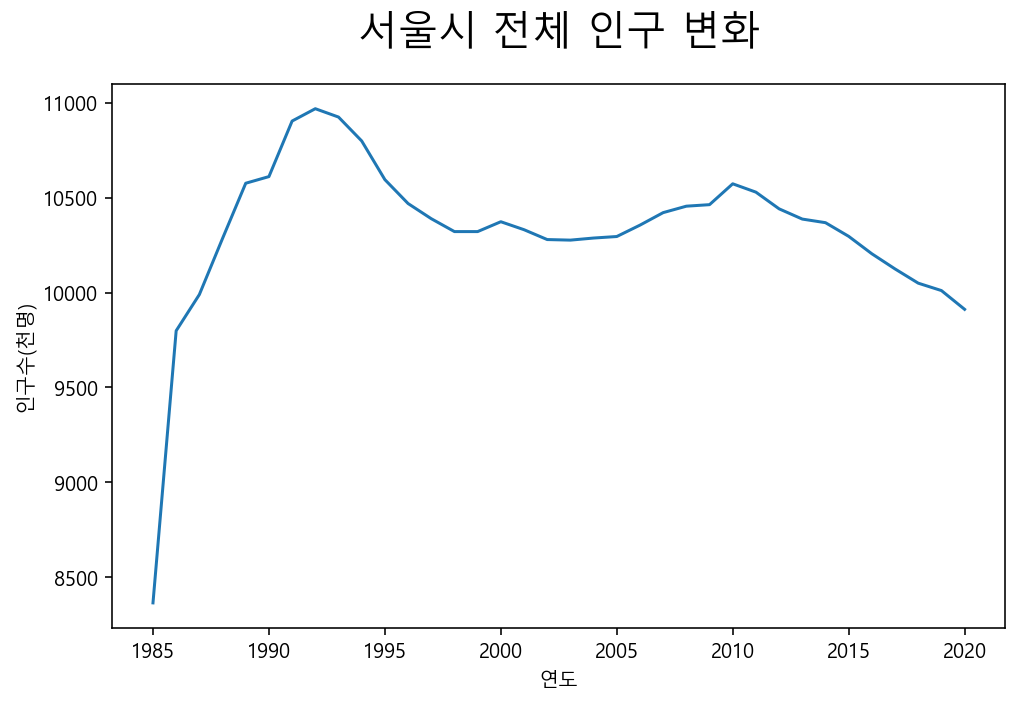

In [146]:
# 전체 인구 변화

# 그래프 크기
plt.figure(figsize=(8,5))

# x축, y축 컬럼
plt.plot(pop['year'], pop['total'])

# 차트 제목
plt.title('서울시 전체 인구 변화', fontsize=20, pad=20)

# 라벨
plt.xlabel('연도')
plt.ylabel('인구수(천명)')

plt.show()

**2) 남녀 인구 변화**

- 전체 남녀 인구 변화를 선 그래프로 시각화해 확인합니다.


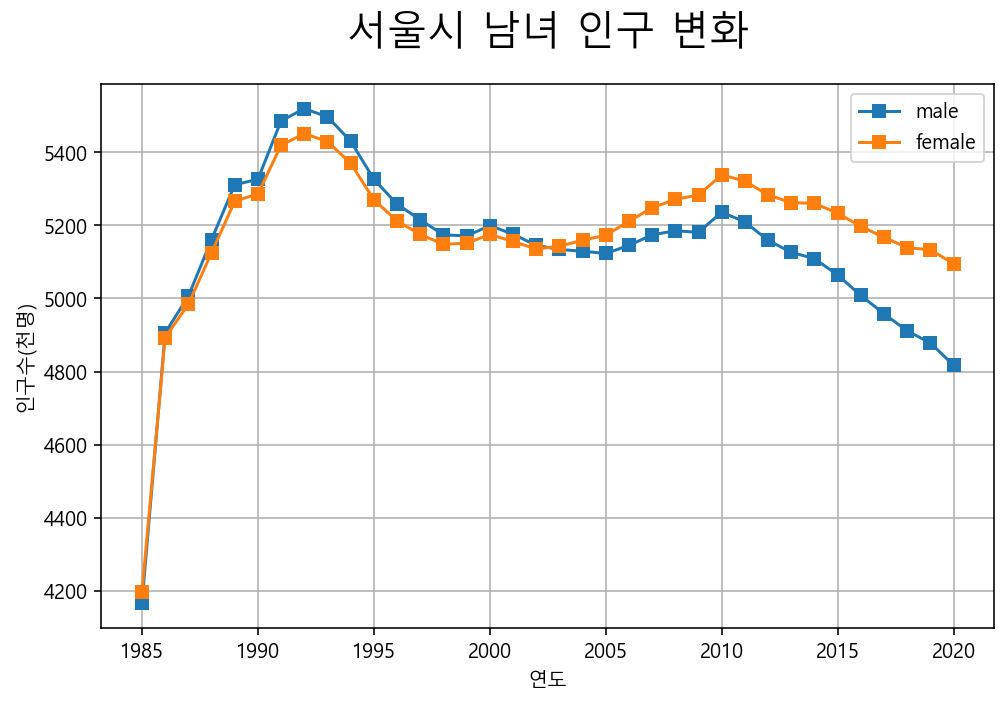

In [135]:
# 남녀 인구 변화

# 그래프 크기
plt.figure(figsize=(8,5))

# x축, y축 컬럼
plt.plot(pop['year'], pop[['male', 'female']], marker='s')

# 차트 제목
plt.title('서울시 남녀 인구 변화', fontsize=20, pad=20)

# 범례 표시 
plt.legend(['male', 'female'])

# 그리드
plt.grid()

# 라벨
plt.xlabel('연도')
plt.ylabel('인구수(천명)')

plt.show()

**3) 한국인 인구 변화**

- 한국인 인구 변화를 선 그래프로 시각화해 확인합니다.

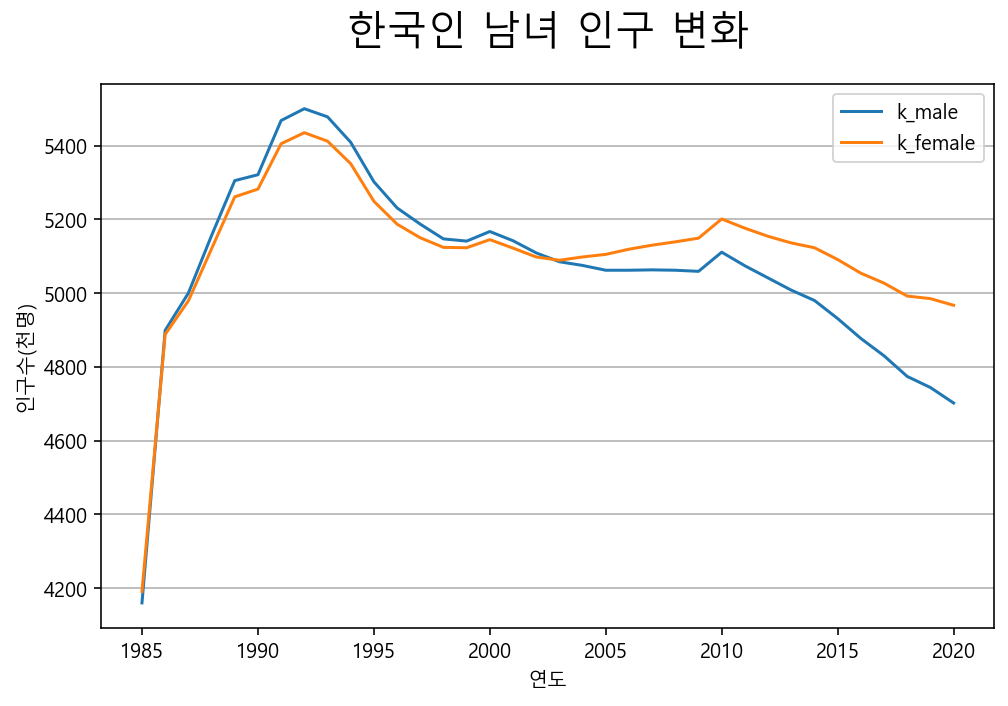

In [157]:
# 한국인 남녀 인구 변화

# 그래프 크기
plt.figure(figsize=(8,5))

# x축, y축 컬럼
plt.plot(pop['year'], pop[['k_male', 'k_female']])

# 차트 제목
plt.title('한국인 남녀 인구 변화', fontsize=20, pad=20)


# 범례 표시 
plt.legend(['k_male', 'k_female'])

# 그리드
plt.grid(axis='y')

# 라벨
plt.xlabel('연도')
plt.ylabel('인구수(천명)')

plt.show()

**4) (옵션) 외국인 인구 변화**

- 외국인 인구 변화를 선 그래프로 시각화해 확인합니다.

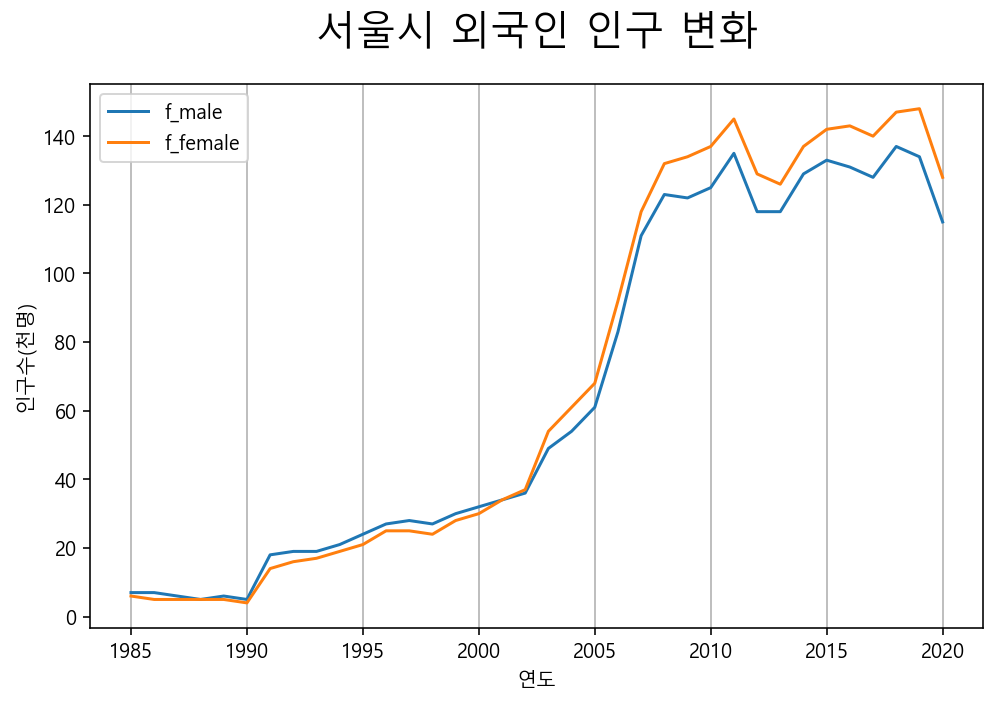

In [158]:
# 외국인 남녀 인구 변화

# 그래프 크기
plt.figure(figsize=(8,5))

# x축, y축 컬럼
plt.plot(pop['year'], pop[['f_male', 'f_female']])

# 차트 제목
plt.title('서울시 외국인 인구 변화', fontsize=20, pad=20)

# 범례 표시 
plt.legend(['f_male', 'f_female'])

# 그리드
plt.grid(axis='x')

# 라벨
plt.xlabel('연도')
plt.ylabel('인구수(천명)')

plt.show()

**5) (옵션) 가구수 변화**

- 가구수 변화를 선 그래프로 시각화해 확인합니다.

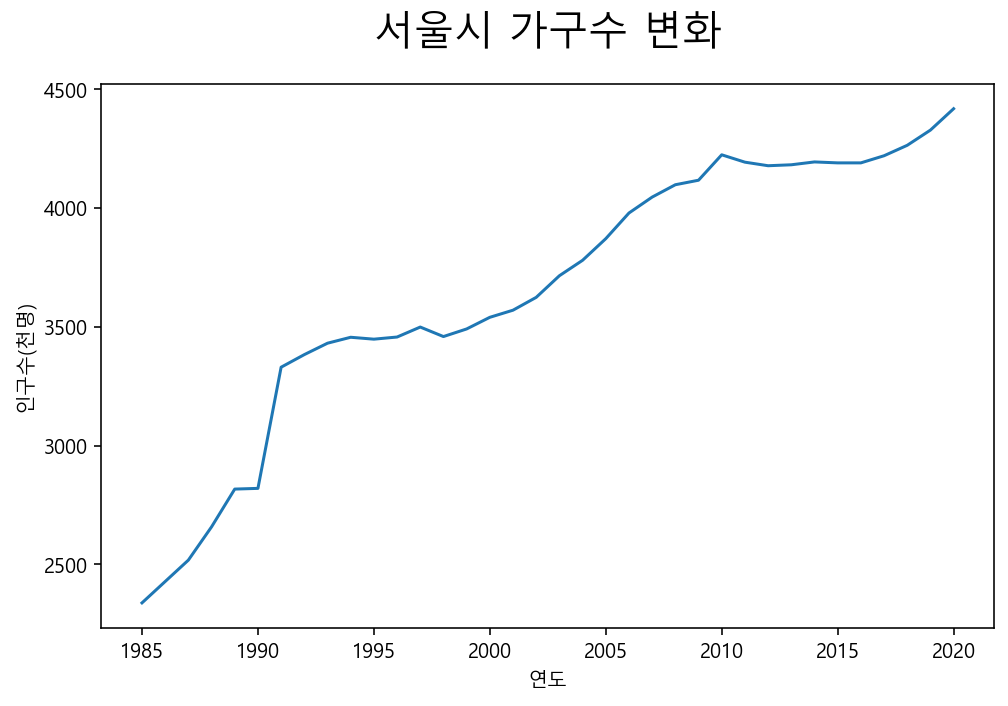

In [155]:
# 가구수 변화

# 그래프 크기
plt.figure(figsize=(8,5))

# x축, y축 컬럼
plt.plot(pop['year'], pop['household'])

# 차트 제목
plt.title('서울시 가구수 변화', fontsize=20, pad=20)

# 라벨
plt.xlabel('연도')
plt.ylabel('인구수(천명)')

plt.show()

**6) (옵션) 노령인구 변화**

- 노령인구 변화를 선 그래프로 시각화해 확인합니다.

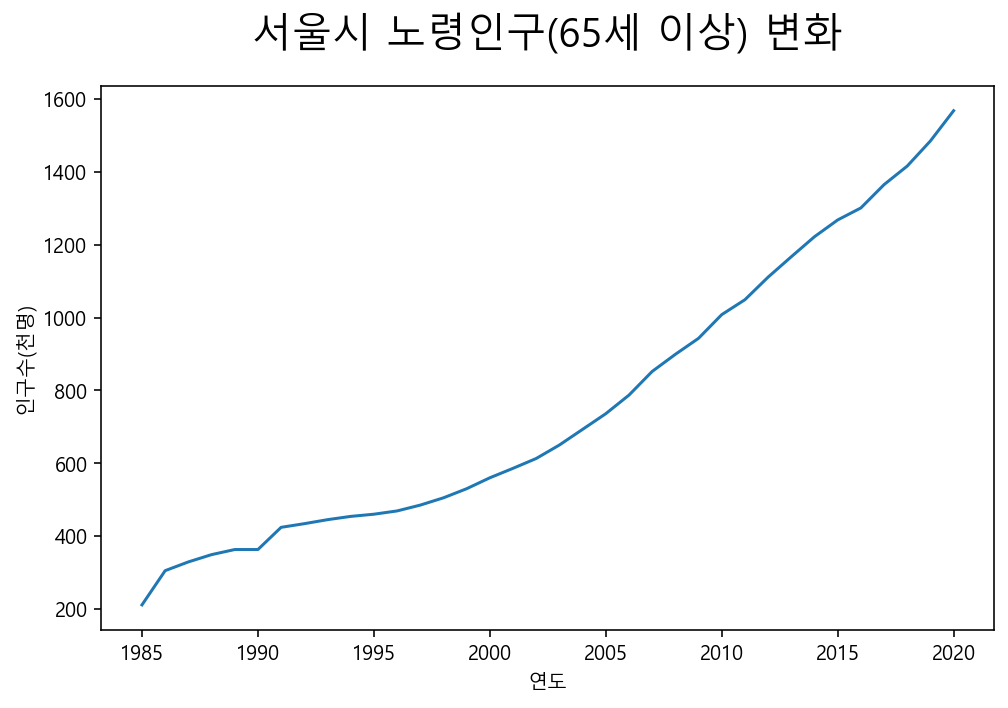

In [156]:
# 65세 이상 변화

# 그래프 크기
plt.figure(figsize=(8,5))

# x축, y축 컬럼
plt.plot(pop['year'], pop['older_65'])

# 차트 제목
plt.title('서울시 노령인구(65세 이상) 변화', fontsize=20, pad=20)

# 라벨
plt.xlabel('연도')
plt.ylabel('인구수(천명)')

plt.show()

## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

- 서울시 전체 인구가 줄고 있다.
- 서울시 외국인 인구는 증가하고 있지만, 최근에 감소하는 추세이다.
- 한국인, 외국인 모두 여자 인구수가 남자인구수 보다 많다.
-  가구수는 증가하는 것으로 보아, 1인 가구증가로 1인 가구를를 위한 정책이 많아져야겠다.
-  65세 이상 노령인구가 계속 증가하고 있다. 고령인구에 대한 정책이 필요해 보인다.

**2) 기타**

- concat 및 merge 보충 공부를 해야겠다.
- 
- 
- 
- 